In [21]:
from PyPurityTools import PyPurityTools as ppt
from PyPurityFunctions import PyPurityFunctions as ppf
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import savgol_filter
import matplotlib.style
import matplotlib as mpl
import math
import scipy.fftpack
from scipy.signal import butter,filtfilt
import scipy.fftpack
import os
import statistics

In [22]:
path_dir: str = r"/unix/dune/purity/2022October14Vacuum/Gold/"

In [23]:
waveform_ch3 = ppf.single_waveform_check(path_dir,"Field_5.10.20Vcm_FibreIn_",".ch3.traces")

In [24]:
waveform_ch3_time=np.arange(len(waveform_ch3[0]))

In [25]:
waveform_ch4 = ppf.single_waveform_check(path_dir,"Field_5.10.20Vcm_FibreIn_",".ch4.traces")

In [26]:
waveform_ch4_time=np.arange(len(waveform_ch4[0]))

In [27]:
bkg_ch3 = ppf.single_waveform_check(path_dir,"Field_5.10.20Vcm_FibreOut_HVOn",".ch3.traces")

In [28]:
bkg_time=np.arange(len(bkg_ch3[0]))

In [29]:
bkg_ch4 = ppf.single_waveform_check(path_dir,"Field_5.10.20Vcm_FibreOut_HVOn",".ch4.traces")

In [30]:
#Set default figure size
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

Text(0.5,1,'A waveform for channel 3 ANODE')

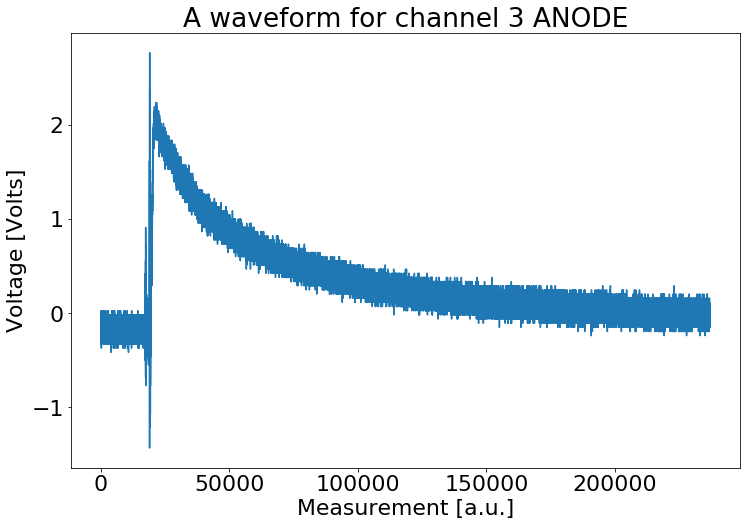

In [31]:
fig, ax = plt.subplots()
ax.plot(waveform_ch3_time,waveform_ch3[0],label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("A waveform for channel 3 ANODE")

Text(0.5,1,'A waveform for channel 4 CATHODE')

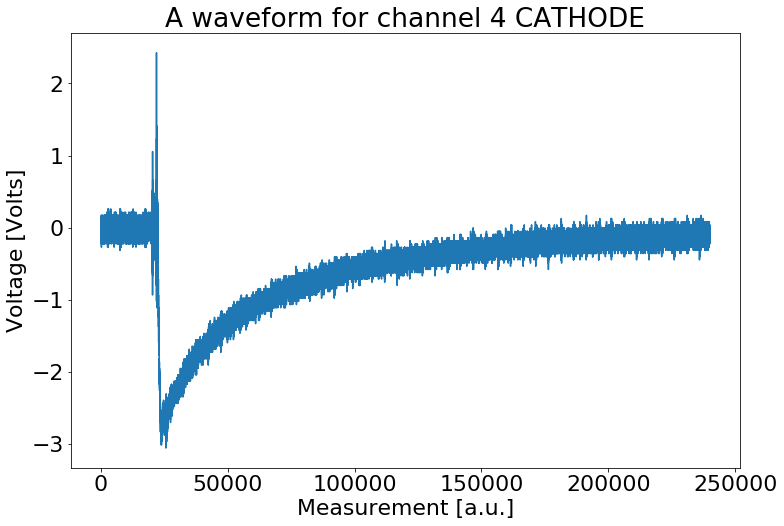

In [32]:
fig, ax = plt.subplots()
ax.plot(waveform_ch4_time,waveform_ch4[0],label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("A waveform for channel 4 CATHODE")

Text(0.5,1,'A background waveform for channel 3')

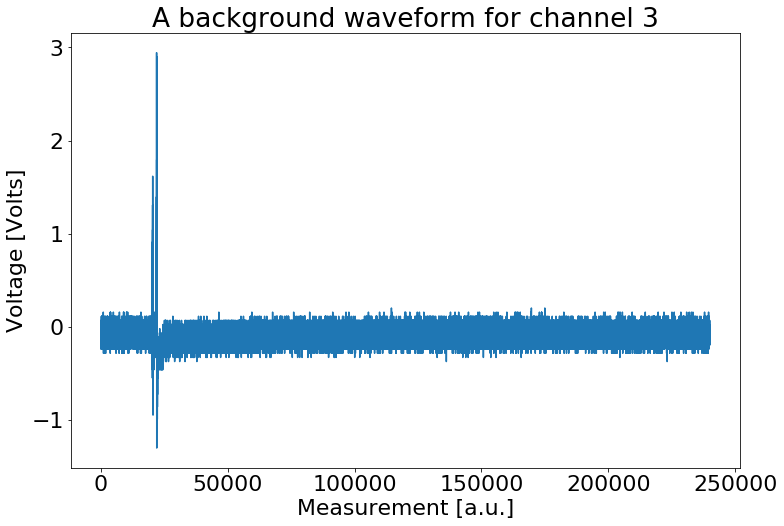

In [33]:
fig, ax = plt.subplots()
ax.plot(bkg_time,bkg_ch3[0],label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("A background waveform for channel 3")

Text(0.5,1,'A background waveform for channel 4')

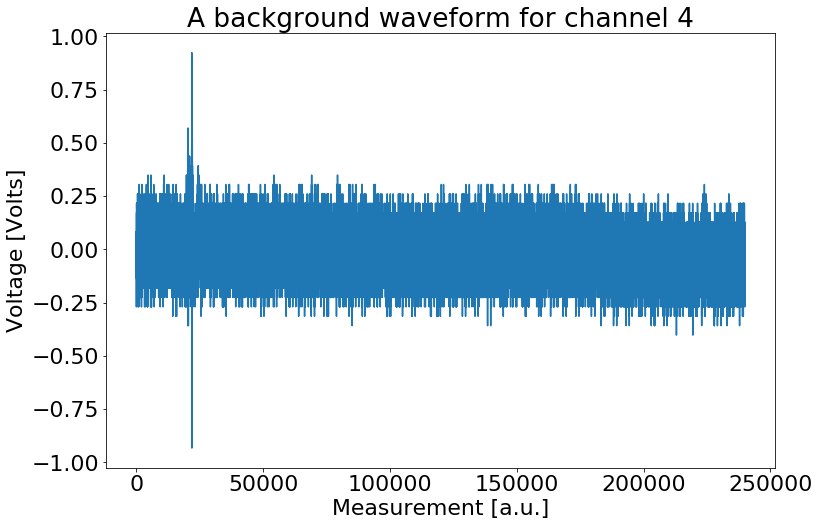

In [34]:
fig, ax = plt.subplots()
ax.plot(bkg_time,bkg_ch4[0],label="Input Pulse")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("A background waveform for channel 4")

In [35]:
path_dir_bkg = "/home/svergani/waveform_study_results/2022_12_05/"

In [36]:
peak_ch3_bkg=ppf.file_collector(path_dir_bkg,"ch3_peaks_")
peak_ch4_bkg=ppf.file_collector(path_dir_bkg,"ch4_peaks_")

filename  ch3_peaks_2022_12_05_13_22_27.npy
filename  ch4_peaks_2022_12_05_13_22_57.npy


In [37]:
peak_ch3_bkg

[3.0743407310433684]

In [38]:
peak_ch4_bkg

[-0.8934084811136127]

In [39]:
path_dir_output: str = r"/home/svergani/waveform_study_results/2022_10_31/"

In [40]:
peaks_ch3=ppf.file_collector(path_dir_output,"ch3_peaks_")
peaks_ch4=ppf.file_collector(path_dir_output,"ch4_peaks_")

filename  ch3_peaks_2022_11_04_10_58_41.npy
filename  ch3_peaks_2022_11_04_11_08_10.npy
filename  ch3_peaks_2022_11_04_11_18_05.npy
filename  ch3_peaks_2022_11_04_11_28_04.npy
filename  ch3_peaks_2022_11_04_11_37_52.npy
filename  ch3_peaks_2022_11_04_11_51_50.npy
filename  ch3_peaks_2022_11_04_12_02_55.npy
filename  ch3_peaks_2022_11_04_12_12_39.npy
filename  ch3_peaks_2022_11_04_12_22_14.npy
filename  ch3_peaks_2022_11_04_12_31_54.npy
filename  ch4_peaks_2022_11_04_12_41_39.npy
filename  ch4_peaks_2022_11_04_12_51_30.npy
filename  ch4_peaks_2022_11_04_13_01_21.npy
filename  ch4_peaks_2022_11_04_13_11_11.npy
filename  ch4_peaks_2022_11_04_13_20_56.npy
filename  ch4_peaks_2022_11_04_13_30_43.npy
filename  ch4_peaks_2022_11_04_13_40_24.npy
filename  ch4_peaks_2022_11_04_13_50_15.npy
filename  ch4_peaks_2022_11_04_13_59_55.npy
filename  ch4_peaks_2022_11_04_14_09_47.npy


In [41]:
ch3_time=np.arange(len(peaks_ch3))
ch4_time=np.arange(len(peaks_ch4))

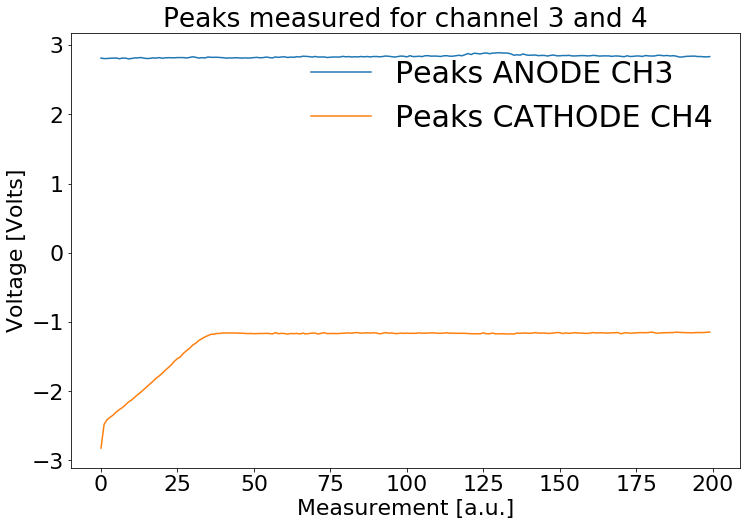

In [47]:
fig, ax = plt.subplots()
ax.plot(ch3_time,peaks_ch3,label="Peaks ANODE CH3")
ax.plot(ch4_time,peaks_ch4, label="Peaks CATHODE CH4")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("Peaks measured for channel 3 and 4")
ax.legend(fontsize=30,loc='upper right')

In [44]:
#remove bakground from peaks
new_peaks_ch3 = []
new_peaks_ch4 = []
for i in range(len(peaks_ch3)):
    new_peaks_ch3.append(peaks_ch3[i]-peak_ch3_bkg)
    new_peaks_ch4.append(peaks_ch4[i]-peak_ch4_bkg)

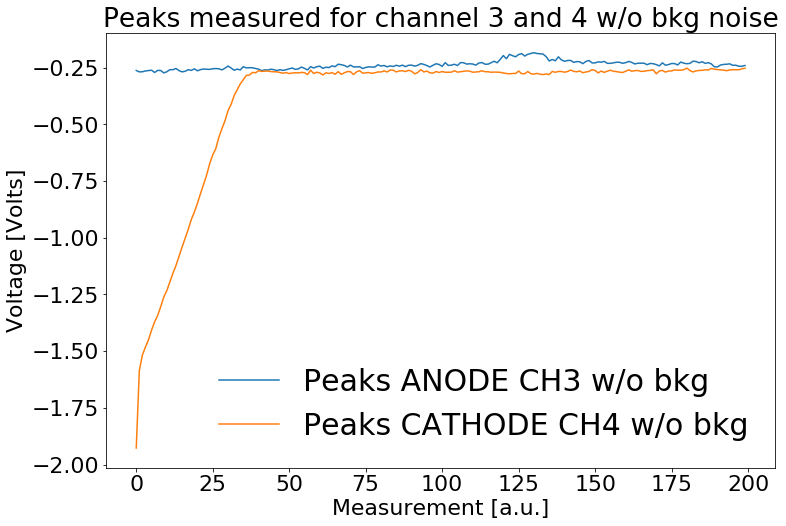

In [49]:
fig, ax = plt.subplots()
ax.plot(ch3_time,new_peaks_ch3,label="Peaks ANODE CH3 w/o bkg")
ax.plot(ch4_time,new_peaks_ch4, label="Peaks CATHODE CH4 w/o bkg")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("Peaks measured for channel 3 and 4 w/o bkg noise")
ax.legend(fontsize=30,loc='lower right')